# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [198]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [200]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [201]:
# Rename all the columns to lower case
df.columns = [col.lower() for col in df.columns]

df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [202]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [203]:
# Change the index to 'linename'
df = df.set_index('linename')

df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [204]:
# Reset the index
df = df.reset_index()

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [205]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].apply(lambda x: len(set(x)))
df = df.sort_values('Num_Lines', ascending=False)

df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
...,...,...,...,...,...,...,...,...,...,...,...,...
112565,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/27/2018,09:28:23,REGULAR,28975,12659,1
112564,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/27/2018,05:16:23,REGULAR,28319,12541,1
112563,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/27/2018,01:04:23,REGULAR,28318,12541,1
112562,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/26/2018,20:52:23,REGULAR,28305,12531,1


Write a function to clean column names: 

In [206]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [207]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = [col.strip() for col in col_name]
    return cleaned

In [208]:
# Use the above function to clean the column names
df.columns = clean(df.columns)

In [209]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [210]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date']).head()

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

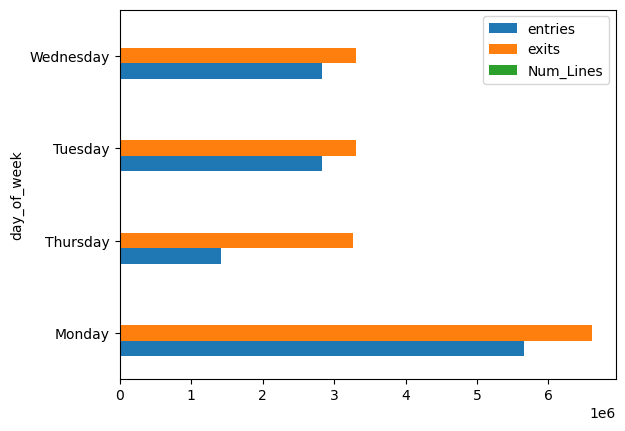

In [211]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')

plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [212]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,day_of_week,entries,exits,Num_Lines
0,Monday,5662758,6612128,24
1,Thursday,1417952,3267016,12
2,Tuesday,2832325,3306433,12
3,Wednesday,2836145,3311412,12


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [213]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

IndexError: index 0 is out of bounds for axis 0 with size 0

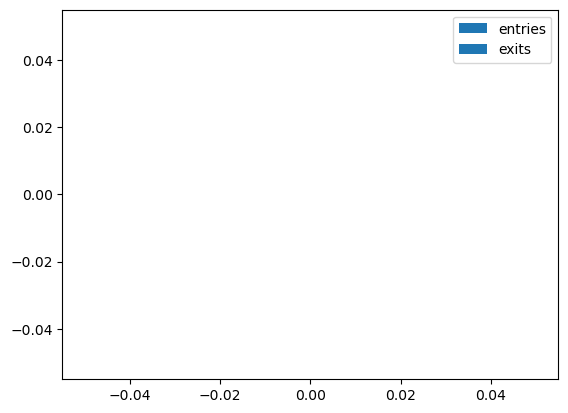

In [214]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

You practiced your data cleanup skills using Pandas.